In [58]:
from braincoder.models import GaussianPointPRF2D
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [72]:
parameters = pd.DataFrame({'mu_x':1.0, 'mu_y':2.0, 'sd_x':1.0, 'sd_y':3.0, 'amplitude':1.0, 'baseline':0.0, 'rho':.75}, index=[0])

In [73]:
import numpy as np

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
paradigm_x, paradigm_y = np.meshgrid(x, y)

# Stack into a 10,000 x 2 array
paradigm = np.column_stack((paradigm_x.ravel(), paradigm_y.ravel()))

In [74]:
model = GaussianPointPRF2D(parameters=parameters, use_covariance=True)

In [75]:
data = model.simulate(paradigm, noise=0.5)

In [76]:
from braincoder.optimize import ParameterFitter

In [77]:
mu_x = np.linspace(-10, 10, 10)
mu_y = np.linspace(-10, 10, 10)
sd_x = np.linspace(1, 10, 10)
sd_y = np.linspace(1, 10, 10)
rho = [0.0]

amplitude = [1.]
baseline = [0.0]


fitter = ParameterFitter(model, data, paradigm, )


pars_grid = fitter.fit_grid(mu_x, mu_y, sd_x, sd_y, rho, amplitude, baseline, use_correlation_cost=True)

pars_grid

Working with chunk size of 66666
Using correlation cost!


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


,mu_x,mu_y,sd_x,sd_y,rho,amplitude,baseline
source,,,,,,,
0,1.111111,1.111111,1.0,3.0,0.0,1.0,0.0


In [78]:
pars_gd = fitter.fit(init_pars=pars_grid)

Number of problematic voxels (mask): 0
Number of voxels remaining (mask): 1


Current R2: 0.06771/Best R2: 0.06771:  26%|██▌       | 261/1000 [00:03<00:08, 86.98it/s]


In [79]:
pars_gd

parameter,mu_x,mu_y,sd_x,sd_y,rho,amplitude,baseline
source,,,,,,,
0,0.962328,1.922749,0.920293,2.921144,0.762372,1.206139,-0.001933


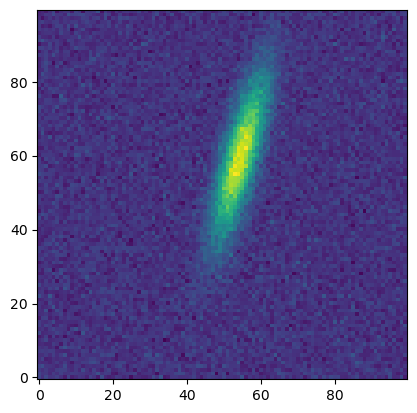

In [80]:
plt.imshow(model.simulate(paradigm, noise=0.05).values.reshape(100, 100), origin='lower')